<a href="https://colab.research.google.com/github/Caceres-A01706972/FruitsVegetables/blob/main/Segundo_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Aqui dse debe de sustituir el path en donde fue guardada la carpeta del Dataset
%cd "/content/drive/MyDrive/IA_8vo/Proyecto IA"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IA_8vo/Proyecto IA
'Copy of FruitsVegetables.ipynb'
 Dataset
 FruitsVegetables.ipynb
 fruit_vegetable_classifier_MobileNetV2.h5
 fruit_vegetable_classifier_Simple.h5
'images (1) (1).jpg'
'images (1).jpg'
 images.jpg
'pngtree-banana-yellow-fruit-banana-skewers-png-image_5944324 (1).png'
 pngtree-banana-yellow-fruit-banana-skewers-png-image_5944324.png
'Prueba de Modelo Nuevo.ipynb'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

In [ ]:
base_dir = 'Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
def proc_img(directorio):
  image_paths = []
  categories = []

  # Recorrer todas las carpetas (categorías) y añadir las imagenes a la lista
  for category in os.listdir(directorio):
      category_path = os.path.join(directorio, category)
      if os.path.isdir(category_path):
          for img_name in os.listdir(category_path):
              if img_name.endswith(('.png', '.jpg', '.jpeg')):
                  image_paths.append(os.path.join(category_path, img_name))
                  categories.append(category)

  # Ponerlo en un Dataframe para facil visualizacion
  df = pd.DataFrame({
      'image_path': image_paths,
      'category': categories
  })

  return df

train_df = proc_img(train_dir)
test_df = proc_img(test_dir)
validation_df = proc_img(validation_dir)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.category.unique())}\n')
print(f'Labels: {train_df.category.unique()}')

-- Training set --

Number of pictures: 3040

Number of different labels: 36

Labels: ['banana' 'apple' 'bell pepper' 'beetroot' 'ginger' 'chilli pepper'
 'cauliflower' 'cucumber' 'corn' 'cabbage' 'capsicum' 'carrot' 'garlic'
 'eggplant' 'onion' 'lettuce' 'pear' 'orange' 'lemon' 'mango' 'grapes'
 'kiwi' 'jalepeno' 'paprika' 'peas' 'pineapple' 'raddish' 'soy beans'
 'sweetpotato' 'potato' 'tomato' 'sweetcorn' 'spinach' 'pomegranate'
 'turnip' 'watermelon']


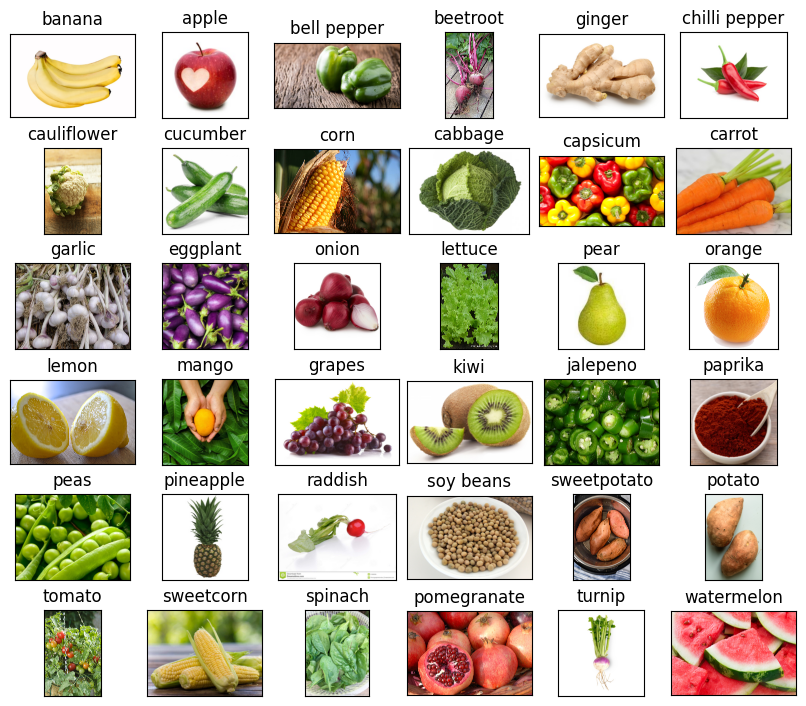

In [ ]:
df_unique = train_df.copy().drop_duplicates(subset=["category"]).reset_index()

# Mostrar algunas imagenes del dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.image_path[i]))
    ax.set_title(df_unique.category[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador de imágenes para el entrenamiento con aumentación de datos
train_generator = ImageDataGenerator(
    rescale=1./255,  # Escalar los valores de los píxeles a [0, 1]
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Crear el generador de imágenes para la validación sin aumentación de datos, solo reescalado
val_generator = ImageDataGenerator(rescale=1./255)

# Crear el generador de imágenes para el test sin aumentación de datos, solo reescalado
test_generator = ImageDataGenerator(rescale=1./255)

# Configurar los generadores utilizando los DataFrames correspondientes
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

val_images = val_generator.flow_from_dataframe(
    dataframe=validation_df,
    x_col='image_path',
    y_col='category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 3040 validated image filenames belonging to 36 classes.
Found 345 validated image filenames belonging to 36 classes.
Found 353 validated image filenames belonging to 36 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(36, activation="softmax")
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
history = model.fit(
    train_images,
    epochs=15,
    validation_data=val_images
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15
95/95 [==============================] - 1427s 15s/step - loss: 3.1972 - accuracy: 0.1128 - val_loss: 2.5543 - val_accuracy: 0.2232
Epoch 2/15
95/95 [==============================] - 580s 6s/step - loss: 2.6367 - accuracy: 0.2109 - val_loss: 2.0775 - val_accuracy: 0.3681
Epoch 3/15
95/95 [==============================] - 578s 6s/step - loss: 2.4014 - accuracy: 0.2625 - val_loss: 1.7989 - val_accuracy: 0.4145
Epoch 4/15
95/95 [==============================] - 588s 6s/step - loss: 2.2454 - accuracy: 0.3194 - val_loss: 1.6135 - val_accuracy: 0.4870
Epoch 5/15
95/95 [==============================] - 578s 6s/step - loss: 2.1332 - accuracy: 0.3480 - val_loss: 1.4394 - val_accuracy: 0.5304
Epoch 6/15
95/95 [==============================] - 579s 6s/step - loss: 2.0532 - accuracy: 0.3490 - val_loss: 1.5047 - val_accuracy: 0.5072
Epoch 7/15
95/95 [==============================] - 575s 6s/step - loss: 2.0014 - accuracy: 0.3714 - val_loss: 1.3598 - val_accuracy: 0.5536
Epoch 8/15


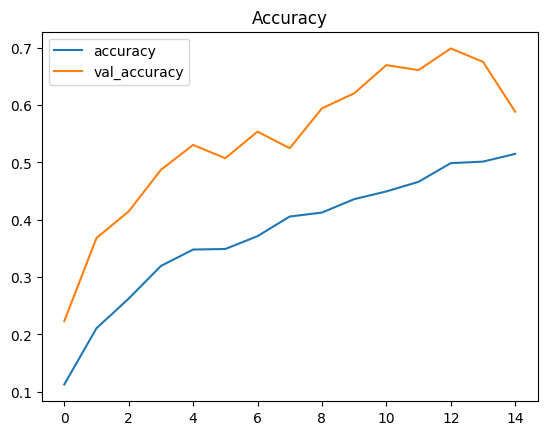

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

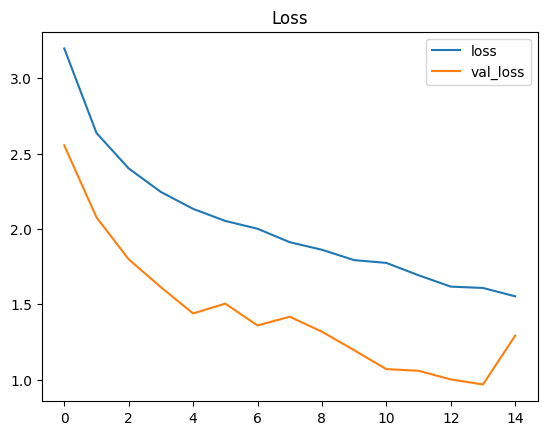

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
# Predecir la categoria en test
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Mapear la categoria
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

12/12 [==============================] - 226s 20s/step


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 58.92%


In [ ]:
# Guardar el modelo completo en el sistema de archivos temporal
model.save('fruit_vegetable_classifier_Second.h5')

# Guardar el modelo en Google Drive
model_save_path = '/content/drive/MyDrive/IA_8vo/Proyecto IA/fruit_vegetable_classifier_Second.h5'
model.save(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Guardar el modelo completo en el sistema de archivos temporal
model.save('fruit_vegetable_classifier_Second.keras')

# Guardar el modelo en Google Drive
model_save_path = '/content/drive/MyDrive/IA_8vo/Proyecto IA/fruit_vegetable_classifier_Second.keras'
model.save(model_save_path)

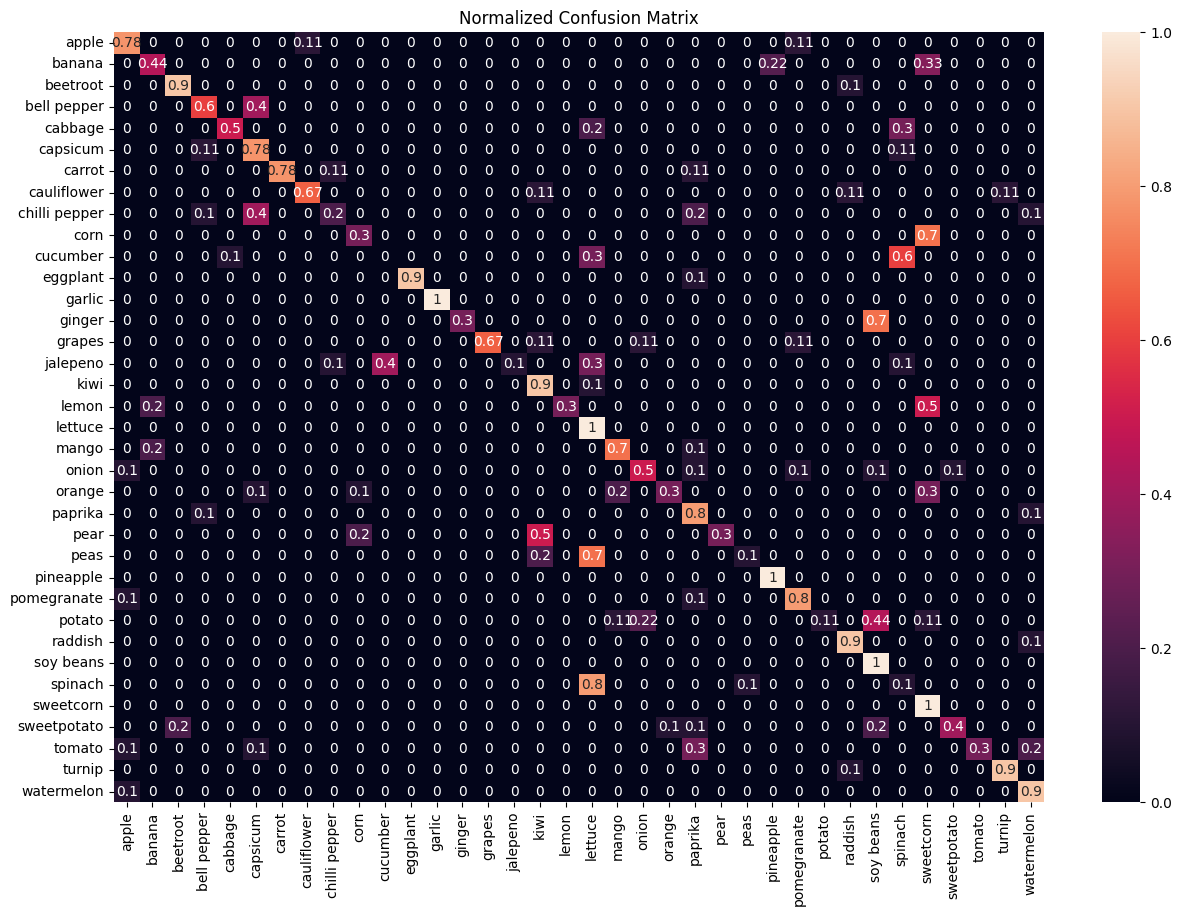

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix,
            annot=True,
            xticklabels = sorted(set(y_test)),
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

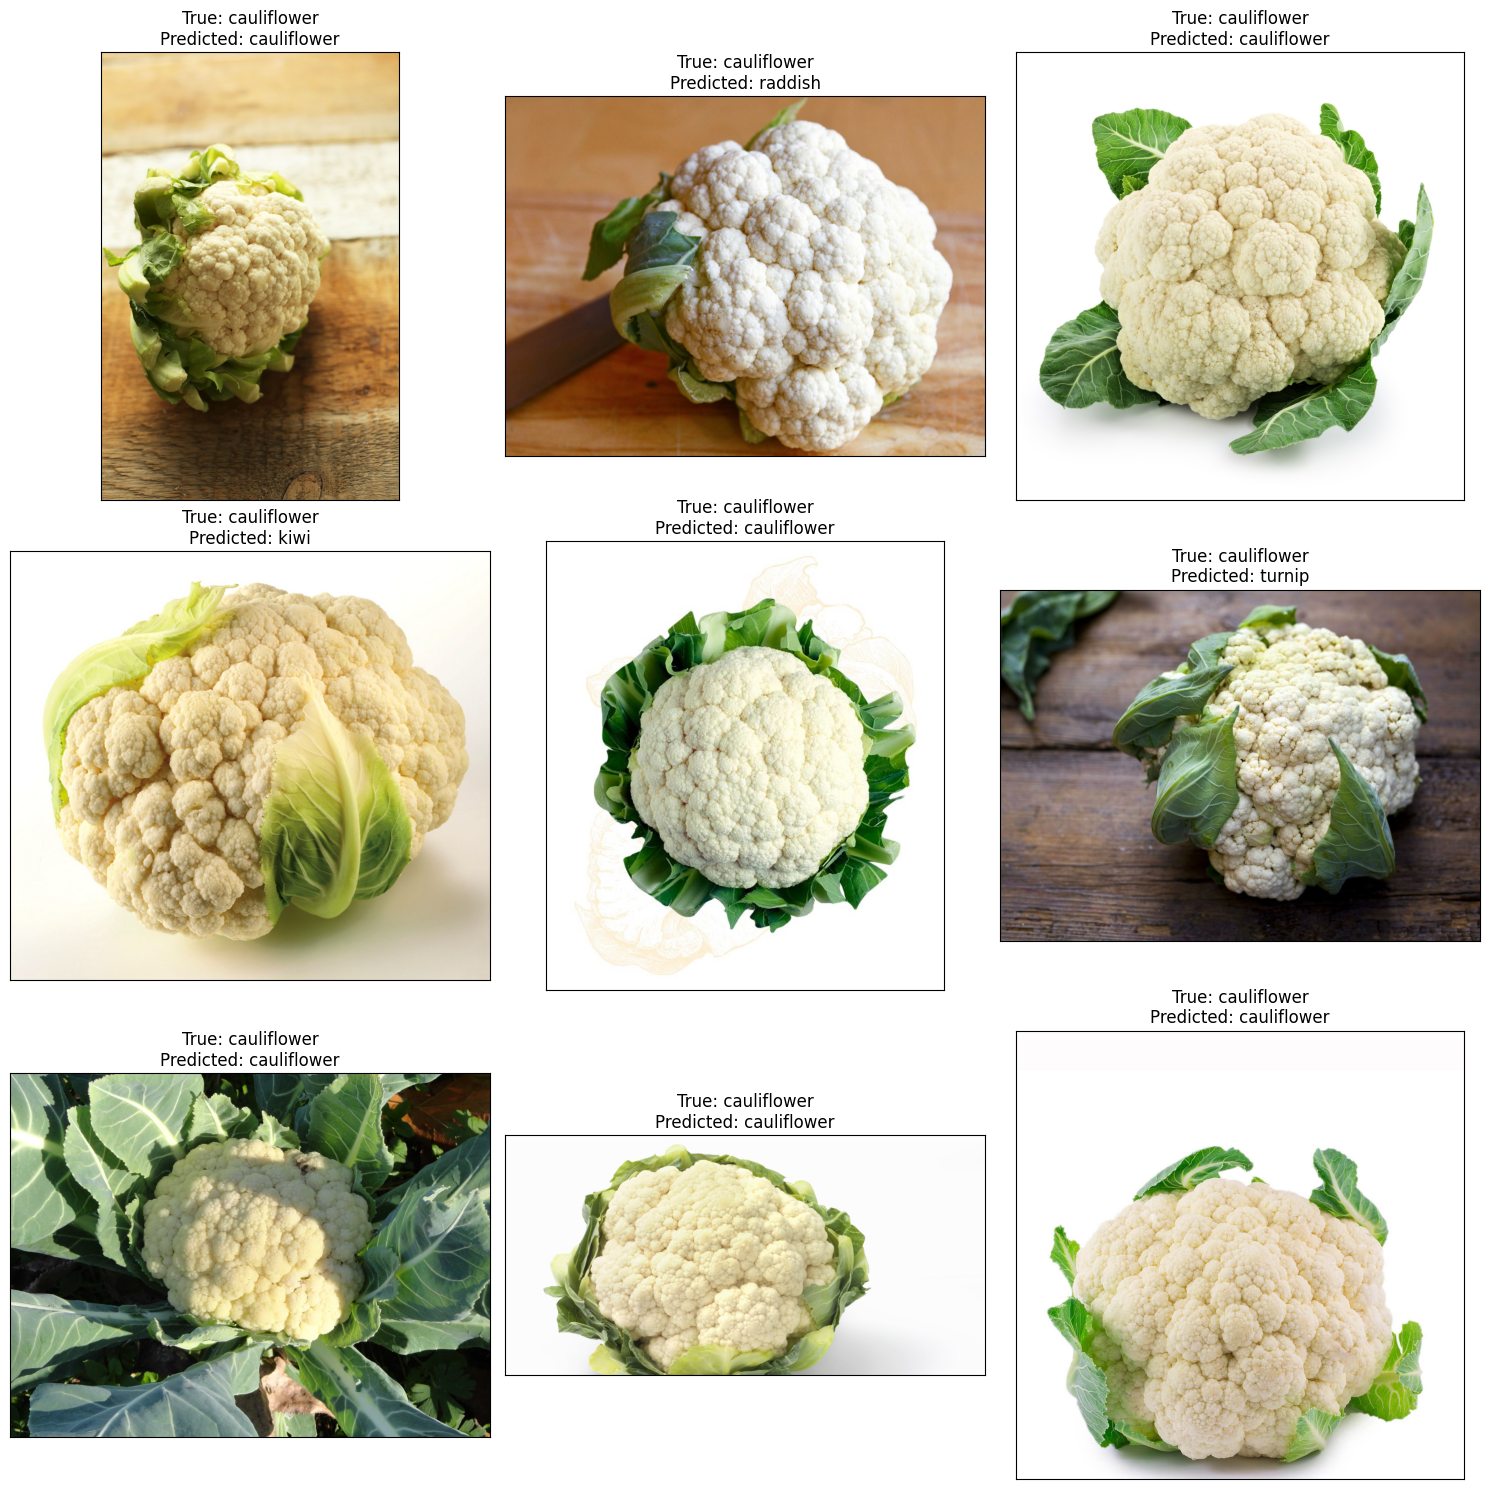

In [ ]:
# Desplegar fotos con su real y prediccion
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.image_path.iloc[i]))
    ax.set_title(f"True: {test_df.category.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [44]:
# Cargar el modelo guardado desde Google Drive
from tensorflow.keras.models import load_model
cnn = load_model(model_save_path)

In [45]:
categories = train_df['category'].unique()
print(categories)

['banana' 'apple' 'bell pepper' 'beetroot' 'ginger' 'chilli pepper'
 'cauliflower' 'cucumber' 'corn' 'cabbage' 'capsicum' 'carrot' 'garlic'
 'eggplant' 'onion' 'lettuce' 'pear' 'orange' 'lemon' 'mango' 'grapes'
 'kiwi' 'jalepeno' 'paprika' 'peas' 'pineapple' 'raddish' 'soy beans'
 'sweetpotato' 'potato' 'tomato' 'sweetcorn' 'spinach' 'pomegranate'
 'turnip' 'watermelon']


Saving garlic-thinkstockphotos-514990456-square.jpg to garlic-thinkstockphotos-514990456-square.jpg
1/1 [==============================] - 0s 67ms/step


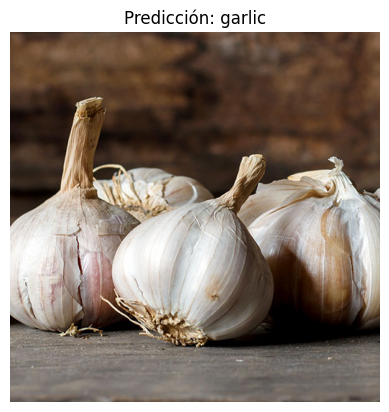

La imagen cargada es de la clase: garlic


In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from PIL import Image


# Función para cargar y preprocesar la imagen
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalizar la imagen
    return img_array

# Pedir al usuario que cargue una imagen
uploaded = files.upload()

for img_path in uploaded.keys():
    # Preprocesar la imagen cargada
    img_array = load_and_preprocess_image(img_path)

    # Hacer la predicción
    prediction = cnn.predict(img_array)

    # Obtener la etiqueta de clase
    class_names = categories
    predicted_class = np.argmax(prediction, axis=1)
    predicted_class_name = class_names[predicted_class[0]]

    # Mostrar la imagen y la predicción
    plt.imshow(Image.open(img_path))
    plt.title(f'Predicción: {predicted_class_name}')
    plt.axis('off')
    plt.show()

    print(f'La imagen cargada es de la clase: {predicted_class_name}')